<a href="https://colab.research.google.com/github/VedanshuThune-11/OIBSIP/blob/main/Task_2/T_3_Car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 3

Vedanshu Thune


# CAR PRICE PREDICTION WITH MACHINE LEARNING

The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
data = pd.read_csv("/content/CarPrice.csv")
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
data = data.drop(columns = ['car_ID', 'CarName'], axis = 1)

In [ ]:
data.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [ ]:
data1 = data[['fueltype','doornumber', 'wheelbase','carlength', 
         'carheight', 'curbweight','cylindernumber', 'enginesize', 'boreratio', 
         'stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg']]

# EDA



<ipython-input-28-147d612d4fbd>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(data1.corr(),cmap="viridis" ,annot = True)


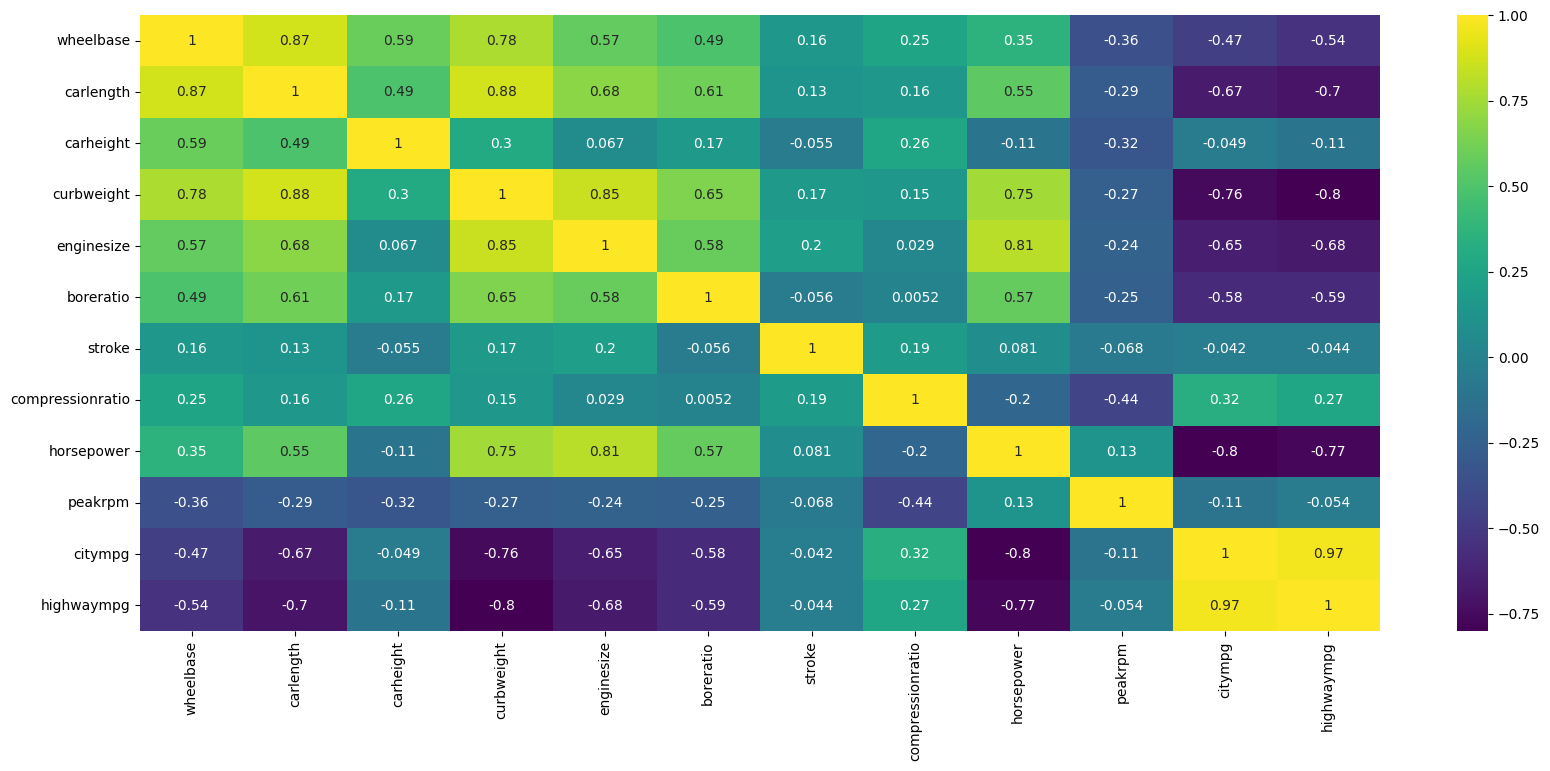

In [ ]:
heatmap = sns.heatmap(data1.corr(),cmap="viridis" ,annot = True)
fig = plt.gcf()
fig.set_size_inches(20, 8)

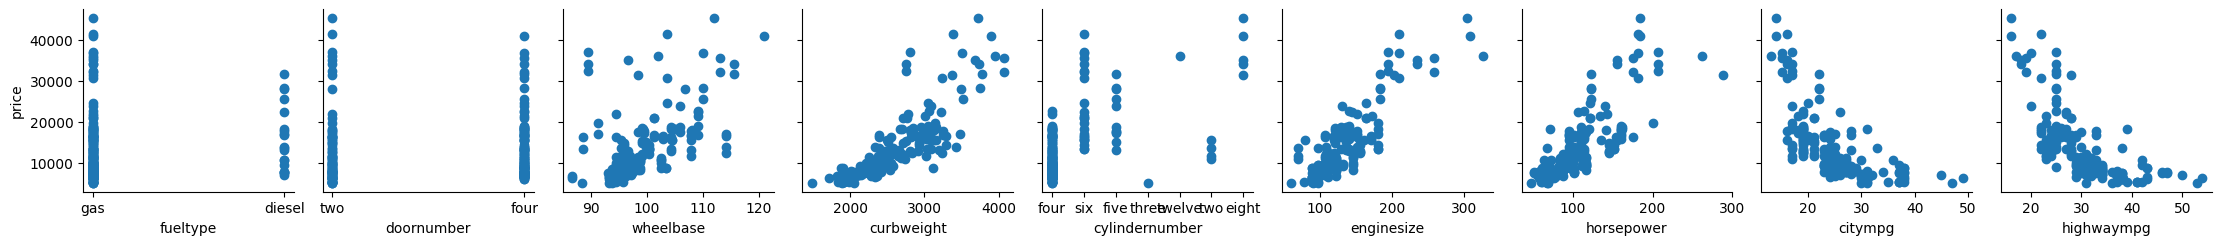

In [ ]:
v = sns.PairGrid(x_vars=data[['fueltype','doornumber','wheelbase', 'curbweight','cylindernumber', 'enginesize','horsepower', 'citympg', 'highwaympg']],y_vars=data[['price']],data=data)
v.map(plt.scatter)

During EDA process we found out that we don't have any null values in our dataset.
Also we gained knowledge about our dependent as well as independent variable for model training


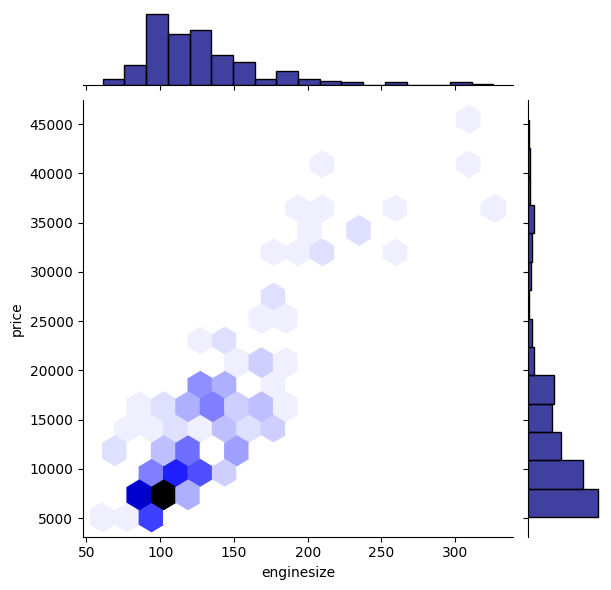

In [ ]:
sns.jointplot(x='enginesize', y='price', data=data, kind='hex',color = "Navy")

# Encoding & Pipelining

In [ ]:
x = data.drop(axis = 1, columns = ["price","fuelsystem","boreratio","aspiration","symboling","carbody","drivewheel",'enginelocation','enginetype','fueltype','doornumber','cylindernumber'])
y = data["price"]
y

0      13495.0
1      16500.0
2      16500.0
3      13950.0
4      17450.0
        ...   
200    16845.0
201    19045.0
202    21485.0
203    22470.0
204    22625.0
Name: price, Length: 205, dtype: float64

In [ ]:
temp=data[["fueltype","doornumber","cylindernumber"]]

In [ ]:
oe = OrdinalEncoder(categories=[['gas', 'diesel'],['four', 'two'],['four', 'eight', 'six', 'five', 'two', 'three', 'twelve']])

In [ ]:
oe.fit(temp)

OrdinalEncoder(categories=[['gas', 'diesel'], ['four', 'two'],
                           ['four', 'eight', 'six', 'five', 'two', 'three',
                            'twelve']])

In [ ]:
temp1 = oe.transform(temp)
temp1

array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 2.],
       [0., 0., 0.],
       [0., 0., 3.],
       [0., 1., 3.],
       [0., 0., 3.],
       [0., 0., 3.],
       [0., 0., 3.],
       [0., 1., 3.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 1., 2.],
       [0., 0., 2.],
       [0., 0., 2.],
       [0., 0., 2.],
       [0., 1., 2.],
       [0., 0., 2.],
       [0., 1., 5.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.],
       [0., 1., 0.],
       [0., 0

In [ ]:
x = np.concatenate((x,temp1),axis=1)
x

array([[ 88.6, 168.8,  64.1, ...,   0. ,   1. ,   0. ],
       [ 88.6, 168.8,  64.1, ...,   0. ,   1. ,   0. ],
       [ 94.5, 171.2,  65.5, ...,   0. ,   1. ,   2. ],
       ...,
       [109.1, 188.8,  68.9, ...,   0. ,   0. ,   2. ],
       [109.1, 188.8,  68.9, ...,   1. ,   0. ,   2. ],
       [109.1, 188.8,  68.9, ...,   0. ,   0. ,   0. ]])

In [ ]:
x.shape

(205, 15)

# Model Training


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=20, test_size=0.15)

In [ ]:
model=lr.fit(x_train,y_train)


In [ ]:
y_pred=lr.predict(x_test)
y_pred

array([17464.6654613 ,  6287.73948874,  6545.91539865, 35208.16363989,
        6134.96319932,  8536.06191461,  5507.35303419, 10218.71105685,
       17610.28855722, 13113.34930554,  5616.13868909, 11480.73654244,
       16847.69714997,  6453.52570534,  9024.77188335,  5291.44841416,
       11569.41512764,  6028.5276132 , 10355.51368412, 17793.43727106,
       10312.13108557,  6061.9635021 , 25943.74020968, 22576.57986482,
       20008.62641096,  9451.00155498,  6392.77956514, 11230.0724183 ,
       20756.61683615,  8298.31414437, 11989.2524246 ])

In [ ]:
y_test.mean()

12245.451612903225

In [ ]:
y_pred.mean()

12261.59681139913

In [ ]:
acc = model.score(x_test, y_test)
print("Linear Regression model accuracy (in %):", acc*100)

Linear Regression model accuracy (in %): 81.53617273757096
